In [2]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Prompt: Lola Tamis wants DigiFoods to describe the transactions that were captured by the loyalty program.
#For the most part, they do not have strict requirements: they will be satisfied with a pivot table,
#though they would of course be pleasantly surprised by deeper insights. 
#At minimum, they want to have a breakdown of the count of each item sold per month, and 
#they also want to have a breakdown of the total sale value per item per month.

#Steps: Identify each item sold in an order. Identify the number of each item. Get the count of these items. 

#notes from the programmer: this requires someone to create a database of grocery items and their prices.

#This function will generate a simple pivot table.
#Inputs: json - type in the name of the json to be read as a string ex: 'transaction-data-adhoc-analysis.json'

def pivottable(json):
    df = pd.read_json(json)
    dfcolumns = list(df.columns)
    dfcolumns.append('quantity')
    df['transaction_items'] = df['transaction_items'].str.split('[;]')
    df = df.explode('transaction_items').reset_index(drop=True)
    dfcolumns.append(dfcolumns.pop(dfcolumns.index('transaction_date')))
    df['quantity'] = df['transaction_items'].str[-4:]
    df['quantity'] = df['quantity'].str[:-1]
    df['quantity'] = df['quantity'].str[2:]
    dfcolumns.append(dfcolumns.pop(dfcolumns.index('transaction_items')))
    df['transaction_items'] = df['transaction_items'].str[:-5]
    df2 = df.pivot_table(index=dfcolumns)
    return(df2)

#This function will return the total amount of each item sold in the given month.
#Inputs: json - type in the name of the json to be read as a string ex: 'transaction-data-adhoc-analysis.json'
# date - insert a string formatted in mm. (ex: '02' for February')

def totalitemspermonth(json, month, marketlist):
    df = pd.read_json(json)
    dfcolumns = list(df.columns)
    dfcolumns.append('quantity')
    dfcolumns.append('month')
    df['transaction_items'] = df['transaction_items'].str.split('[;]')
    df = df.explode('transaction_items').reset_index(drop=True)
    dfcolumns.append(dfcolumns.pop(dfcolumns.index('transaction_date')))
    df['quantity'] = df['transaction_items'].str[-4:]
    df['quantity'] = df['quantity'].str[:-1]
    df['quantity'] = df['quantity'].str[2:]
    df['quantity'] = df['quantity'].astype(str).astype(float).astype(int)
    dfcolumns.append(dfcolumns.pop(dfcolumns.index('transaction_items')))
    df['transaction_items'] = df['transaction_items'].str[:-5]
    df['month'] = df['transaction_date'].str[-5:]
    dfcolumns.append(dfcolumns.pop(dfcolumns.index('month')))
    df['month'] = df['month'].str[:2]
    df2 = df.loc[df['month'] == month]
    df3 = pd.pivot_table(
        df2,
        index=['transaction_items'],
        aggfunc={'quantity': np.sum}
        )
    dfa = pd.read_json(marketlist)
    df4 = pd.merge(df3,dfa,on='transaction_items')
    df5 = df4
    df5['total value in month'] = df4['price'] * df4['quantity']
    df6 = pd.pivot_table(df5, index=['transaction_items'])
    return(df6)

#This function generates a number of graphs that plot out the transaction_value over date.
#It can be used to see whether or not there is a fluctuation in the overall transactions.
def graphs(json):
    df = pd.read_json(json)
    dfcolumns = list(df.columns)
    dfcolumns.append('quantity')
    dfcolumns.append('month')
    df['transaction_items'] = df['transaction_items'].str.split('[;]')
    df = df.explode('transaction_items').reset_index(drop=True)
    dfcolumns.append(dfcolumns.pop(dfcolumns.index('transaction_date')))
    df['quantity'] = df['transaction_items'].str[-4:]
    df['quantity'] = df['quantity'].str[:-1]
    df['quantity'] = df['quantity'].str[2:]
    df['quantity'] = df['quantity'].astype(str).astype(float).astype(int)
    dfcolumns.append(dfcolumns.pop(dfcolumns.index('transaction_items')))
    df['transaction_items'] = df['transaction_items'].str[:-5]
    df['month'] = df['transaction_date'].str[-5:]
    dfcolumns.append(dfcolumns.pop(dfcolumns.index('month')))
    df['month'] = df['month'].str[:2]
    df['transaction_date'] = pd.to_datetime(df['transaction_date'])

    jandf = df.loc[df['month'] == '01']
    febdf = df.loc[df['month'] == '02']
    mardf = df.loc[df['month'] == '03']
    aprdf = df.loc[df['month'] == '04']
    maydf = df.loc[df['month'] == '05']
    jundf = df.loc[df['month'] == '06']

    jandf = jandf.sort_values(by = 'transaction_date')
    febdf = febdf.sort_values(by = 'transaction_date')
    mardf = mardf.sort_values(by = 'transaction_date')
    aprdf = aprdf.sort_values(by = 'transaction_date')
    maydf = maydf.sort_values(by = 'transaction_date')
    jundf = jundf.sort_values(by = 'transaction_date')

    jantransactionvalue = jandf.transaction_value.values.tolist()
    jantransactiondate = jandf.transaction_date.values.tolist()

    plt.plot(jantransactiondate, jantransactionvalue, "k")
    plt.xlabel("Transaction Date")
    plt.ylabel("Transaction Value")
    plt.title('January Transactions')
    plt.show()

    febtransactionvalue = febdf.transaction_value.values.tolist()
    febtransactiondate = febdf.transaction_date.values.tolist()

    plt.plot(febtransactiondate, febtransactionvalue, "k")
    plt.xlabel("Transaction Date")
    plt.ylabel("Transaction Value")
    plt.title('February Transactions')
    plt.show()

    martransactionvalue = mardf.transaction_value.values.tolist()
    martransactiondate = mardf.transaction_date.values.tolist()

    plt.plot(martransactiondate, martransactionvalue, "k")
    plt.xlabel("Transaction Date")
    plt.ylabel("Transaction Value")
    plt.title('March Transactions')
    plt.show()

    aprtransactionvalue = aprdf.transaction_value.values.tolist()
    aprtransactiondate = aprdf.transaction_date.values.tolist()

    plt.plot(aprtransactiondate, aprtransactionvalue, "k")
    plt.xlabel("Transaction Date")
    plt.ylabel("Transaction Value")
    plt.title('April Transactions')
    plt.show()

    maytransactionvalue = maydf.transaction_value.values.tolist()
    maytransactiondate = maydf.transaction_date.values.tolist()

    plt.plot(maytransactiondate, maytransactionvalue, "k")
    plt.xlabel("Transaction Date")
    plt.ylabel("Transaction Value")
    plt.title('May Transactions')
    plt.show()

    juntransactionvalue = jundf.transaction_value.values.tolist()
    juntransactiondate = jundf.transaction_date.values.tolist()

    plt.plot(juntransactiondate, juntransactionvalue, "k")
    plt.xlabel("Transaction Date")
    plt.ylabel("Transaction Value")
    plt.title('June Transactions')
    plt.show()
    
#This function will show all transactions that occured on a certain date (yyyy/mm/dd).
#Inputs: json, date - insert a string formatted in yyyy/mm/dd

def transactionsonday(json, date):
    df = pd.read_json(json)
    dfcolumns = list(df.columns)
    dfcolumns.append('quantity')
    df['transaction_items'] = df['transaction_items'].str.split('[;]')
    df = df.explode('transaction_items').reset_index(drop=True)
    dfcolumns.append(dfcolumns.pop(dfcolumns.index('transaction_date')))
    df['quantity'] = df['transaction_items'].str[-4:]
    df['quantity'] = df['quantity'].str[:-1]
    df['quantity'] = df['quantity'].str[2:]
    dfcolumns.append(dfcolumns.pop(dfcolumns.index('transaction_items')))
    df['transaction_items'] = df['transaction_items'].str[:-5]
    df2 = df.loc[df['transaction_date'] == date]
    df3 = df2.pivot_table(index=dfcolumns)
    return(df3)

#This function will show all transactions belonging to a person.
def customertransactions(json, name):
    df = pd.read_json(json)
    df2 = df.loc[df['name'] == name]
    return(df2)

#This is a function to turn any json into an Excel file. Although very niche, I imagine this might be useful to the consumer in case they want to dissect a json without a program.
#Inputs: json - type in the name of the json to be read as a string ex: 'transaction-data-adhoc-analysis.json'

def printexcel(json):
    df = pd.read_json(json)
    df.to_excel('analysis.xlsx')
    return("Operation complete.")

#This function can be edited by the end user to create a json of the list of prices for items.
#Simply modify the list with the format 'name of product' : price,
#Note that with the way the program is set up the product name should follow the format {'transaction_items' : 'brandname', 'productname' : price}
#If on a new installation of this program WITHOUT a marketlist, please run this first.

def generatejson():
    marketlist =[{'transaction_items' : 'Exotic Extras,Beef Chicharon', 'price' : 1299},
                 {'transaction_items' : 'HealthyKid 3+,Yummy Vegetables', 'price' : 500},
                 {'transaction_items' : 'Exotic Extras,Kimchi and Seaweed', 'price' : 799},
                 {'transaction_items' : 'Candy City, Gummy Worms', 'price' : 150},
                 {'transaction_items' : 'Candy City,Orange Beans', 'price' : 199},
                 {'transaction_items' : 'HealthyKid 3+,Gummy Vitamins', 'price' : 1500},
                 {'transaction_items' : 'HealthyKid 3+,Nutrional Milk', 'price' : 1990}
                ]
    with open('marketlist.json', 'w') as outfile:
        json.dump(marketlist, outfile)
    return("Operation complete.")

In [3]:
pivottable('transaction-data-adhoc-analysis.json')

Empty DataFrame
Columns: []
Index: [(000 Cox Square Suite 649
North Angelbury, NH 13218, 1968/10/03, nicholas27@gmail.com, Scott Jackson, M, psoto, 2000, 4, 2022/02/08, HealthyKid 3+,Yummy Vegetables), (000 Cox Square Suite 649
North Angelbury, NH 13218, 1968/10/03, nicholas27@gmail.com, Scott Jackson, M, psoto, 2945, 1, 2022/02/27, Candy City,Gummy Worms), (000 Cox Square Suite 649
North Angelbury, NH 13218, 1968/10/03, nicholas27@gmail.com, Scott Jackson, M, psoto, 2945, 2, 2022/02/27, Candy City,Orange Beans), (000 Cox Square Suite 649
North Angelbury, NH 13218, 1968/10/03, nicholas27@gmail.com, Scott Jackson, M, psoto, 2945, 3, 2022/02/27, Exotic Extras,Kimchi and Seaweed), (000 Cox Square Suite 649
North Angelbury, NH 13218, 1968/10/03, nicholas27@gmail.com, Scott Jackson, M, psoto, 3098, 1, 2022/02/28, HealthyKid 3+,Gummy Vitamins), (000 Cox Square Suite 649
North Angelbury, NH 13218, 1968/10/03, nicholas27@gmail.com, Scott Jackson, M, psoto, 3098, 2, 2022/02/28, Exotic Extras,Kimchi and Seaweed), (000 Cox Square Suite 649
North Angelbury, NH 13218, 1968/10/03, nicholas27@gmail.com, Scott Jackson, M, psoto, 5445, 2, 2022/06/14, Exotic Extras,Beef Chicharon), (000 Cox Square Suite 649
North Angelbury, NH 13218, 1968/10/03, nicholas27@gmail.com, Scott Jackson, M, psoto, 5445, 3, 2022/06/14, Candy City,Gummy Worms), (000 Cox Square Suite 649
North Angelbury, NH 13218, 1968/10/03, nicholas27@gmail.com, Scott Jackson, M, psoto, 5445, 3, 2022/06/14, Exotic Extras,Kimchi and Seaweed), (000 Cox Square Suite 649
North Angelbury, NH 13218, 1968/10/03, nicholas27@gmail.com, Scott Jackson, M, psoto, 11259, 1, 2022/06/07, Exotic Extras,Beef Chicharon), (000 Cox Square Suite 649
North Angelbury, NH 13218, 1968/10/03, nicholas27@gmail.com, Scott Jackson, M, psoto, 11259, 4, 2022/06/07, HealthyKid 3+,Nutrional Milk), (000 Cox Square Suite 649
North Angelbury, NH 13218, 1968/10/03, nicholas27@gmail.com, Scott Jackson, M, psoto, 11259, 4, 2022/06/07, HealthyKid 3+,Yummy Vegetables), (000 Derek Lock
East Karaville, NH 21641, 1971/11/04, wparker@yahoo.com, Benjamin Wolfe, M, lorismith, 649, 1, 2022/04/18, Candy City,Orange Beans), (000 Derek Lock
East Karaville, NH 21641, 1971/11/04, wparker@yahoo.com, Benjamin Wolfe, M, lorismith, 649, 3, 2022/04/18, Candy City,Gummy Worms), (000 Derek Lock
East Karaville, NH 21641, 1971/11/04, wparker@yahoo.com, Benjamin Wolfe, M, lorismith, 1000, 2, 2022/06/16, HealthyKid 3+,Yummy Vegetables), (000 Derek Lock
East Karaville, NH 21641, 1971/11/04, wparker@yahoo.com, Benjamin Wolfe, M, lorismith, 2799, 1, 2022/04/05, Exotic Extras,Beef Chicharon), (000 Derek Lock
East Karaville, NH 21641, 1971/11/04, wparker@yahoo.com, Benjamin Wolfe, M, lorismith, 2799, 1, 2022/04/05, HealthyKid 3+,Gummy Vitamins), (000 Derek Lock
East Karaville, NH 21641, 1971/11/04, wparker@yahoo.com, Benjamin Wolfe, M, lorismith, 3193, 3, 2022/06/10, Exotic Extras,Kimchi and Seaweed), (000 Derek Lock
East Karaville, NH 21641, 1971/11/04, wparker@yahoo.com, Benjamin Wolfe, M, lorismith, 3193, 4, 2022/06/10, Candy City,Orange Beans), (000 Derek Lock
East Karaville, NH 21641, 1971/11/04, wparker@yahoo.com, Benjamin Wolfe, M, lorismith, 3236, 1, 2022/04/15, HealthyKid 3+,Nutrional Milk), (000 Derek Lock
East Karaville, NH 21641, 1971/11/04, wparker@yahoo.com, Benjamin Wolfe, M, lorismith, 3236, 3, 2022/04/15, Candy City,Gummy Worms), (000 Derek Lock
East Karaville, NH 21641, 1971/11/04, wparker@yahoo.com, Benjamin Wolfe, M, lorismith, 3236, 4, 2022/04/15, Candy City,Orange Beans), (000 Derek Lock
East Karaville, NH 21641, 1971/11/04, wparker@yahoo.com, Benjamin Wolfe, M, lorismith, 3286, 1, 2022/05/23, HealthyKid 3+,Nutrional Milk), (000 Derek Lock
East Karaville, NH 21641, 1971/11/04, wparker@yahoo.com, Benjamin Wolfe, M, lorismith, 3286, 1, 2022/05/23, HealthyKid 3+,Yummy Vegetables), (000 Derek Lock
East Karaville, NH 21641, 1971/11/04, wparker@yahoo.com, Benjamin Wolfe, M, lorismith, 3286, 4, 2022/05/23, Candy City,Orange Beans), (000 

In [4]:
generatejson()

'Operation complete.'

In [5]:
totalitemspermonth('transaction-data-adhoc-analysis.json', '02', 'marketlist.json')

,price,quantity,total value in month
transaction_items,,,
"Candy City,Orange Beans",199,10037,1997363
"Exotic Extras,Beef Chicharon",1299,10001,12991299
"Exotic Extras,Kimchi and Seaweed",799,9949,7949251
"HealthyKid 3+,Gummy Vitamins",1500,9980,14970000
"HealthyKid 3+,Nutrional Milk",1990,9691,19285090
"HealthyKid 3+,Yummy Vegetables",500,10256,5128000


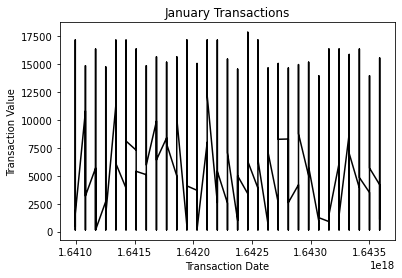

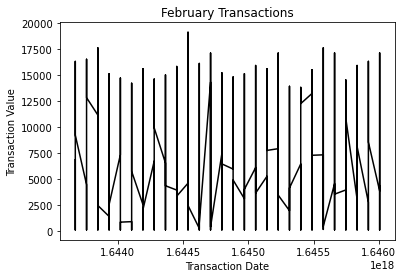

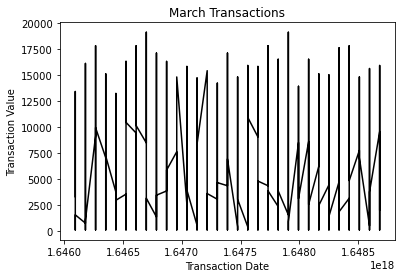

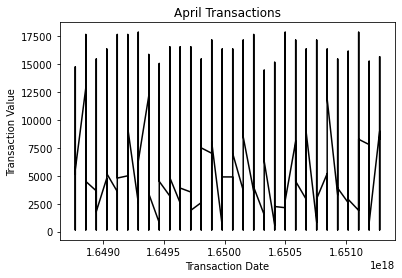

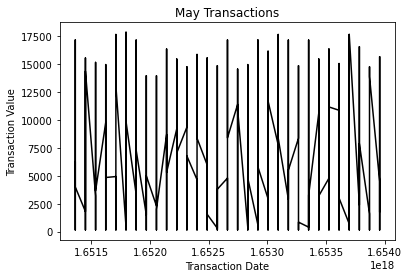

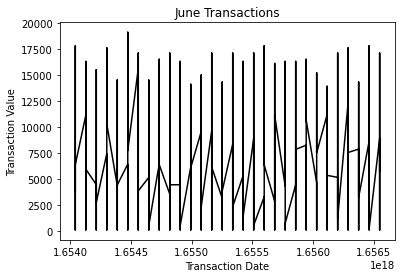

In [6]:
graphs('transaction-data-adhoc-analysis.json')

In [7]:
transactionsonday('transaction-data-adhoc-analysis.json','2022/02/08')

Empty DataFrame
Columns: []
Index: [(000 Cox Square Suite 649
North Angelbury, NH 13218, 1968/10/03, nicholas27@gmail.com, Scott Jackson, M, psoto, 2000, 4, 2022/02/08, HealthyKid 3+,Yummy Vegetables), (000 Rodriguez Extensions
Mirandaborough, PA 74072, 1947/12/05, richardbrewer@hotmail.com, Eric Robertson, M, fcowan, 4000, 2, 2022/02/08, HealthyKid 3+,Gummy Vitamins), (000 Rodriguez Extensions
Mirandaborough, PA 74072, 1947/12/05, richardbrewer@hotmail.com, Eric Robertson, M, fcowan, 4000, 2, 2022/02/08, HealthyKid 3+,Yummy Vegetables), (0052 Wendy Prairie Apt. 182
Clarkeshire, AR 89253, 2007/09/30, mooreerin@yahoo.com, Carrie Hernandez, F, sharon97, 11306, 1, 2022/02/08, Candy City,Gummy Worms), (0052 Wendy Prairie Apt. 182
Clarkeshire, AR 89253, 2007/09/30, mooreerin@yahoo.com, Carrie Hernandez, F, sharon97, 11306, 4, 2022/02/08, Exotic Extras,Kimchi and Seaweed), (0052 Wendy Prairie Apt. 182
Clarkeshire, AR 89253, 2007/09/30, mooreerin@yahoo.com, Carrie Hernandez, F, sharon97, 11306, 4, 2022/02/08, HealthyKid 3+,Nutrional Milk), (006 Duran Island
Carpenterchester, AK 86180, 1952/07/26, hamiltonamy@yahoo.com, Sophia Taylor, F, victorialester, 11316, 1, 2022/02/08, Candy City,Gummy Worms), (006 Duran Island
Carpenterchester, AK 86180, 1952/07/26, hamiltonamy@yahoo.com, Sophia Taylor, F, victorialester, 11316, 3, 2022/02/08, HealthyKid 3+,Nutrional Milk), (006 Duran Island
Carpenterchester, AK 86180, 1952/07/26, hamiltonamy@yahoo.com, Sophia Taylor, F, victorialester, 11316, 4, 2022/02/08, Exotic Extras,Beef Chicharon), (0087 Amy Extensions Apt. 765
East Anthonyshire, CO 09628, 1987/11/29, traci33@gmail.com, Sydney Hudson, F, samantha34, 1797, 1, 2022/02/08, Candy City,Orange Beans), (0087 Amy Extensions Apt. 765
East Anthonyshire, CO 09628, 1987/11/29, traci33@gmail.com, Sydney Hudson, F, samantha34, 1797, 2, 2022/02/08, Exotic Extras,Kimchi and Seaweed), (01231 Sherri Stravenue Suite 666
Williamsstad, CA 70893, 1977/03/31, jeffrey85@hotmail.com, Stephen Jackson, M, caguilar, 7877, 2, 2022/02/08, HealthyKid 3+,Nutrional Milk), (01231 Sherri Stravenue Suite 666
Williamsstad, CA 70893, 1977/03/31, jeffrey85@hotmail.com, Stephen Jackson, M, caguilar, 7877, 3, 2022/02/08, Exotic Extras,Beef Chicharon), (01699 Garcia Rue
Lake Amy, MA 63493, 1931/06/18, victoria16@yahoo.com, Glenn Ramsey, M, thomassmith, 2397, 3, 2022/02/08, Exotic Extras,Kimchi and Seaweed), (0177 Eric Inlet
Randyfurt, IL 54631, 1981/10/03, adamruiz@yahoo.com, Jonathan Combs, M, sarahwong, 649, 1, 2022/02/08, Candy City,Orange Beans), (0177 Eric Inlet
Randyfurt, IL 54631, 1981/10/03, adamruiz@yahoo.com, Jonathan Combs, M, sarahwong, 649, 3, 2022/02/08, Candy City,Gummy Worms), (020 Gina Club Suite 501
Port Aprilside, WV 49836, 1911/07/03, mannsandra@yahoo.com, Jennifer Holt, F, josephdean, 5696, 1, 2022/02/08, HealthyKid 3+,Yummy Vegetables), (020 Gina Club Suite 501
Port Aprilside, WV 49836, 1911/07/03, mannsandra@yahoo.com, Jennifer Holt, F, josephdean, 5696, 4, 2022/02/08, Exotic Extras,Beef Chicharon), (022 Justin Center Apt. 209
New Martinton, DE 73918, 1918/10/08, wallsjudith@gmail.com, Kayla Robinson, F, rodney62, 3397, 1, 2022/02/08, Exotic Extras,Kimchi and Seaweed), (022 Justin Center Apt. 209
New Martinton, DE 73918, 1918/10/08, wallsjudith@gmail.com, Kayla Robinson, F, rodney62, 3397, 2, 2022/02/08, Exotic Extras,Beef Chicharon), (025 Mueller Lakes
Coxchester, OK 55605, 2002/08/03, shannon13@yahoo.com, Eric Stevens, M, upace, 1500, 3, 2022/02/08, HealthyKid 3+,Yummy Vegetables), (02501 Martinez Mountains
Port Amberborough, NC 14197, 1926/01/31, dannygonzalez@yahoo.com, Amy Mack, F, velazquezmackenzie, 6779, 1, 2022/02/08, Exotic Extras,Beef Chicharon), (02501 Martinez Mountains
Port Amberborough, NC 14197, 1926/01/31, dannygonzalez@yahoo.com, Amy Mack, F, velazquezmackenzie, 6779, 1, 2022/02/08, HealthyKid 3+,Gummy Vitamins), (02501 Martinez Mountains
Port Amberborough, NC 14197, 1926/01/31, dannygonzalez@yahoo.com, Amy Mack, F, velazquezmackenzie, 67

In [8]:
customertransactions('transaction-data-adhoc-analysis.json','Scott Jackson')

,address,birthdate,mail,name,sex,username,transaction_items,transaction_value,transaction_date
24143,"000 Cox Square Suite 649\nNorth Angelbury, NH ...",1968/10/03,nicholas27@gmail.com,Scott Jackson,M,psoto,"HealthyKid 3+,Yummy Vegetables,(x4)",2000,2022/02/08
24144,"000 Cox Square Suite 649\nNorth Angelbury, NH ...",1968/10/03,nicholas27@gmail.com,Scott Jackson,M,psoto,"Candy City,Gummy Worms,(x1);Candy City,Orange ...",2945,2022/02/27
24145,"000 Cox Square Suite 649\nNorth Angelbury, NH ...",1968/10/03,nicholas27@gmail.com,Scott Jackson,M,psoto,"HealthyKid 3+,Gummy Vitamins,(x1);Exotic Extra...",3098,2022/02/28
79608,"000 Cox Square Suite 649\nNorth Angelbury, NH ...",1968/10/03,nicholas27@gmail.com,Scott Jackson,M,psoto,"Exotic Extras,Beef Chicharon,(x1);HealthyKid 3...",11259,2022/06/07
79609,"000 Cox Square Suite 649\nNorth Angelbury, NH ...",1968/10/03,nicholas27@gmail.com,Scott Jackson,M,psoto,"Candy City,Gummy Worms,(x3);Exotic Extras,Beef...",5445,2022/06/14


In [9]:
printexcel('transaction-data-adhoc-analysis.json')

'Operation complete.'